Script 4: 
- Explore categorical features' classes
- Combine these classes
- Remove features with zero importance score
- Compare models after the above data cleaning

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import Normalizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score

from imblearn.over_sampling import SMOTE, ADASYN


/anaconda3/lib/python3.6/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


## Base Model

In [2]:
df_modified = pd.read_csv('df_modified.csv')
display(df_modified.head())

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DOCUMENT_SUM
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,2.0,2.0,1134.0,0.0,0.0,0.0,0.0,0.0,1.0,1
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,815.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,2.0,0.0,617.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,1106.0,0.0,0.0,0.0,0.0,0.0,0.0,1


#### Data Cleaning

In [3]:
# Change categorical variable
ordinal_encoder = OrdinalEncoder()
cat_encoded = ordinal_encoder.fit_transform(df_modified.select_dtypes('object'))
df_cat_encoded = pd.DataFrame(cat_encoded, columns = df_modified.select_dtypes('object').columns)

# Normalize numeric variables
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df_num = df_modified.select_dtypes(include = numerics)
df_col = df_num.columns[2:]
transformer = Normalizer().fit(df_num.iloc[:,2:])
df_index = df_num.iloc[:,0:2]
df_num = pd.DataFrame(transformer.transform(df_num.iloc[:,2:]), columns = df_col)

# Combine Data
df_num = pd.concat([df_index, df_num], axis=1, sort = False)
df_modified = pd.concat([df_num, df_cat_encoded], axis=1, sort=False) 

display(df_modified.head())
display(df_modified.shape)

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,AGE,DAYS_EMPLOYED,...,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE
0,100002,1,0.0,0.352423,0.707626,0.042988,0.610866,3.272049e-08,0.000045,0.001109,...,0.0,1.0,6.0,7.0,4.0,3.0,1.0,8.0,6.0,5.0
1,100003,0,0.0,0.155288,0.743946,0.020532,0.649621,2.036573e-09,0.000026,0.000683,...,0.0,0.0,1.0,4.0,1.0,1.0,1.0,3.0,1.0,39.0
2,100004,0,0.0,0.333046,0.666092,0.033305,0.666092,4.949801e-08,0.000257,0.001110,...,1.0,1.0,6.0,7.0,4.0,3.0,1.0,8.0,1.0,11.0
3,100006,0,0.0,0.298021,0.690267,0.065535,0.655647,1.770247e-08,0.000115,0.006709,...,0.0,1.0,6.0,7.0,4.0,0.0,1.0,8.0,6.0,5.0
4,100007,0,0.0,0.165093,0.697060,0.029711,0.697060,3.894705e-08,0.000075,0.004128,...,0.0,1.0,6.0,7.0,4.0,3.0,1.0,3.0,4.0,37.0


(307511, 53)

#### Downsampling

In [4]:
# downsampling
# Count the number of Target 0 & 1
count0, count1 = df_modified.TARGET.value_counts()

# Split the Target 0 & 1
df_class0 = df_modified[df_modified['TARGET'] == 0]
df_class1 = df_modified[df_modified['TARGET'] == 1]

# Sample from Target 0
df_class0_resample = df_class0.sample(count1)

# Combine the Sampled Target 0 & Target 1
df_balance = pd.concat([df_class0_resample, df_class1], axis=0).reset_index(drop = True)

display(df_balance.head())
display(df_balance.shape)

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,AGE,DAYS_EMPLOYED,...,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE
0,291415,0,0.000000,0.063273,0.705492,0.020627,0.705492,1.342861e-08,0.000036,0.008024,...,0.0,1.0,6.0,7.0,4.0,1.0,1.0,18.0,5.0,30.0
1,432747,0,0.000000,0.129725,0.742402,0.042615,0.655832,5.017477e-08,0.000104,0.002639,...,0.0,1.0,5.0,3.0,4.0,1.0,1.0,18.0,1.0,57.0
2,293500,0,0.000000,0.317616,0.702313,0.046935,0.635233,6.317842e-08,0.000044,0.001141,...,0.0,1.0,6.0,7.0,4.0,1.0,1.0,18.0,1.0,47.0
3,124614,0,0.000000,0.468245,0.624327,0.031216,0.624327,1.005971e-07,0.000075,0.001300,...,0.0,1.0,6.0,1.0,1.0,3.0,1.0,8.0,5.0,35.0
4,405847,0,0.000002,0.197482,0.780132,0.034648,0.592445,6.874341e-08,0.000097,0.007610,...,0.0,1.0,6.0,4.0,4.0,1.0,1.0,3.0,0.0,41.0


(49650, 53)

#### Random Forest

In [5]:
# Random Forest
# 1. Data Prepariation
Y = np.array(df_balance['TARGET'])
X = df_balance.drop('TARGET', axis = 1).iloc[:,1:]
feature = list(X.columns)
X = np.array(X) 

# 2. Split data into training and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42) 

# 3. Train the Random Forest on Training Data
rf = RandomForestClassifier(n_estimators = 1000, random_state = 42, bootstrap=True, n_jobs=-1, min_samples_split=20, min_samples_leaf=10)
rf.fit(X_train, Y_train)

Y_pred = rf.predict(X_test)
Y_pred_prob = rf.predict_proba(X_test)

In [6]:
# AUC Score
metrics.roc_auc_score(Y_test, Y_pred)

0.635066544992296

In [7]:
# Confusion Matrix
confusion_matrix(Y_test, Y_pred)

array([[5335, 2872],
       [3107, 5071]])

In [8]:
Y_positive_prob = Y_pred_prob[:,1]
precision1, recall1, _ = precision_recall_curve(Y_test, Y_positive_prob)

Text(0.5,1,'Precision-Recall Curve: Original Data')

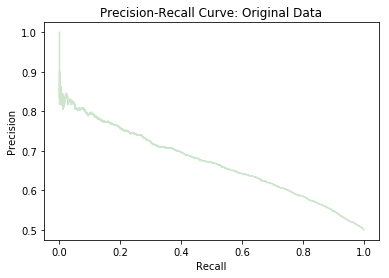

In [10]:
# Precision-Recall Curve
plt.step(recall1, precision1, color='g', alpha=0.2, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title("Precision-Recall Curve: Original Data")

## Import Data: Combined Data

In [11]:
df_modified = pd.read_csv('Combined.csv')

display(df_modified.head())
display(df_modified.shape)

,Unnamed: 0,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,...,STATUS_2_TO_4_PERC,CHILDREN_RATIO,INCOME_PER_CHLD,EMPLOYED_BIRTH_RATIO,LOAN_INCOME_RATIO,ANNUITY_LENGTH,CAR_TO_BIRTH_RATIO,OWN_CAR_AGE_TO_EMPLOY_RATIO,INCOME_PER_PERSON,ANNUITY_INCOME_PERC
0,0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,...,0.0,0.0,202500.0,0.067329,2.007889,16.461104,NaN,NaN,12.218500,0.349252
1,1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,...,0.0,0.0,270000.0,0.070862,4.790750,36.234085,NaN,NaN,11.813037,0.363615
2,2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,...,0.0,0.0,67500.0,0.011814,2.000000,20.000000,-0.001365,-0.115556,11.119898,0.316225
3,3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,...,NaN,0.0,135000.0,0.159905,2.316167,10.532818,NaN,NaN,11.119898,0.468933
4,4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,...,0.0,0.0,121500.0,0.152418,4.222222,23.461618,NaN,NaN,11.707678,0.424219


(307511, 341)

In [12]:
df_modified = df_modified.drop(df_modified.columns[0], axis=1)

display(df_modified.head())
display(df_modified.shape)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,STATUS_2_TO_4_PERC,CHILDREN_RATIO,INCOME_PER_CHLD,EMPLOYED_BIRTH_RATIO,LOAN_INCOME_RATIO,ANNUITY_LENGTH,CAR_TO_BIRTH_RATIO,OWN_CAR_AGE_TO_EMPLOY_RATIO,INCOME_PER_PERSON,ANNUITY_INCOME_PERC
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0,0.0,202500.0,0.067329,2.007889,16.461104,NaN,NaN,12.218500,0.349252
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,0.0,270000.0,0.070862,4.790750,36.234085,NaN,NaN,11.813037,0.363615
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,67500.0,0.011814,2.000000,20.000000,-0.001365,-0.115556,11.119898,0.316225
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,NaN,0.0,135000.0,0.159905,2.316167,10.532818,NaN,NaN,11.119898,0.468933
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,121500.0,0.152418,4.222222,23.461618,NaN,NaN,11.707678,0.424219


(307511, 340)

#### Data Cleaning

In [13]:
# Replace Infinity value
df_modified['AMT_CREDIT_SUM_RATIO'][df_modified['AMT_CREDIT_SUM_RATIO']>1000000] = df_modified['AMT_CREDIT_SUM_RATIO'].median()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [14]:
def missingval(data):

    miss_tot = data.isnull().sum()
    miss_perc = data.isnull().sum()/len(data)
    miss_table = pd.concat([miss_tot,miss_perc],axis = 1, keys = ['miss_tot','miss_perc']).sort_values(by = 'miss_perc',ascending = False)
    miss_table_unique = miss_table.drop_duplicates('miss_tot')
    return miss_table,miss_table_unique

In [15]:
# missing variables
df_miss,df_miss_u = missingval(df_modified)
#drop missing data greater than 40%
df_modified.drop(df_miss[df_miss.miss_perc > 0.4].index,axis = 1,inplace = True)
#miss_app[miss_app.miss_perc > 0.4]
df_miss.head()

,miss_tot,miss_perc
COMMONAREA_MEDI,214865,0.698723
COMMONAREA_AVG,214865,0.698723
COMMONAREA_MODE,214865,0.698723
NONLIVINGAPARTMENTS_MODE,213514,0.694330
NONLIVINGAPARTMENTS_AVG,213514,0.694330


In [16]:
df_modified.STATUS_X_PERC.fillna(1,inplace = True)
df_modified.STATUS_C_PERC.fillna(0,inplace = True)
df_modified.STATUS_0_PERC.fillna(0,inplace = True)
df_modified.STATUS_1_PERC.fillna(0,inplace = True)
df_modified.STATUS_5_PERC.fillna(0,inplace = True)
df_modified.STATUS_2_TO_4_PERC.fillna(0,inplace = True)

In [17]:
# Use median to fill the rest of numeric feature
df_modified.fillna(df_modified.median(),inplace=True)
df_modified.fillna('XNA',inplace=True)

In [18]:
# Remove the TARGET_MAX
df_modified = df_modified.loc[:,~df_modified.columns.str.startswith('TARGET_')]

display(df_modified.head())
display(df_modified.shape)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,STATUS_C_PERC,STATUS_X_PERC,STATUS_2_TO_4_PERC,CHILDREN_RATIO,INCOME_PER_CHLD,EMPLOYED_BIRTH_RATIO,LOAN_INCOME_RATIO,ANNUITY_LENGTH,INCOME_PER_PERSON,ANNUITY_INCOME_PERC
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.209091,0.136364,0.0,0.0,202500.0,0.067329,2.007889,16.461104,12.218500,0.349252
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.000000,1.000000,0.0,0.0,270000.0,0.070862,4.790750,36.234085,11.813037,0.363615
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.000000,1.000000,0.0,0.0,67500.0,0.011814,2.000000,20.000000,11.119898,0.316225
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.000000,1.000000,0.0,0.0,135000.0,0.159905,2.316167,10.532818,11.119898,0.468933
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.000000,1.000000,0.0,0.0,121500.0,0.152418,4.222222,23.461618,11.707678,0.424219


(307511, 288)

#### Down Sampling

In [19]:
# Count the number of Target 0 & 1
count0, count1 = df_modified.TARGET.value_counts()

# Split the Target 0 & 1
df_class0 = df_modified[df_modified['TARGET'] == 0]
df_class1 = df_modified[df_modified['TARGET'] == 1]

# Sample from Target 0
df_class0_resample = df_class0.sample(count1)

# Combine the Sampled Target 0 & Target 1
df_balance = pd.concat([df_class0_resample, df_class1], axis=0).reset_index(drop = True)

display(df_balance.head())
display(df_balance.shape)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,STATUS_C_PERC,STATUS_X_PERC,STATUS_2_TO_4_PERC,CHILDREN_RATIO,INCOME_PER_CHLD,EMPLOYED_BIRTH_RATIO,LOAN_INCOME_RATIO,ANNUITY_LENGTH,INCOME_PER_PERSON,ANNUITY_INCOME_PERC
0,179789,0,Cash loans,F,N,Y,1,148500.0,390960.0,18805.5,...,0.095238,0.380952,0.000000,0.50,74250.0,0.447809,2.632727,20.789663,11.215207,0.355859
1,283326,0,Cash loans,M,N,Y,0,270000.0,738108.0,53842.5,...,0.604167,0.140625,0.002604,0.00,270000.0,0.139678,2.733733,13.708650,11.813037,0.446560
2,291792,0,Cash loans,F,N,Y,0,157500.0,396000.0,19390.5,...,0.000000,1.000000,0.000000,0.00,157500.0,0.270028,2.514286,20.422372,11.274046,0.350875
3,247071,0,Cash loans,M,N,N,2,270000.0,1973565.0,54270.0,...,0.000000,1.000000,0.000000,0.50,90000.0,0.104434,7.309500,36.365672,11.119898,0.448329
4,285911,0,Cash loans,F,N,Y,3,180000.0,273636.0,21748.5,...,0.000000,1.000000,0.000000,0.75,45000.0,0.086789,1.520200,12.581833,10.714440,0.347598


(49650, 288)

## Base Random Forest:  Before Combining Class

In [11]:
df_balance1 = df_balance.copy()

#### Data Cleaning

In [12]:
# Change categorical variable
ordinal_encoder = OrdinalEncoder()
cat_encoded = ordinal_encoder.fit_transform(df_balance1.select_dtypes('object'))
df_cat_encoded = pd.DataFrame(cat_encoded, columns = df_balance1.select_dtypes('object').columns)

# Normalize numeric variables
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df_num = df_balance1.select_dtypes(include = numerics)
df_col = df_num.columns[2:]
transformer = Normalizer().fit(df_num.iloc[:,2:])
df_index = df_num.iloc[:,0:2]
df_num = pd.DataFrame(transformer.transform(df_num.iloc[:,2:]), columns = df_col)

# Combine Data
df_num = pd.concat([df_index, df_num], axis=1, sort = False)
df_balance1 = pd.concat([df_num, df_cat_encoded], axis=1, sort=False) 

display(df_balance1.head())
display(df_balance1.shape)

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,NAME_CLIENT_TYPE_Pre,NAME_GOODS_CATEGORY_Pre,NAME_PORTFOLIO_Pre,NAME_PRODUCT_TYPE_Pre,CHANNEL_TYPE_Pre,NAME_SELLER_INDUSTRY_Pre,NAME_YIELD_GROUP_Pre,PRODUCT_COMBINATION_Pre,CREDIT_ACTIVE_MAX,CREDIT_TYPE_MAX
0,352555,0,5.912713e-07,0.109090,0.637509,0.022664,0.532144,8.999740e-09,-0.011095,0.215958,...,9.0,542.0,20.0,0.0,82.0,149.0,14.0,1775.0,2.0,3.0
1,194405,0,1.116096e-06,0.100449,0.276234,0.013812,0.276234,2.032299e-08,-0.016738,0.407646,...,2.0,19.0,3.0,0.0,7.0,102.0,27.0,1811.0,2.0,3.0
2,123265,0,3.575572e-07,0.016090,0.038675,0.002337,0.033387,1.191559e-10,-0.001342,-0.000158,...,2.0,24.0,9.0,0.0,5.0,10.0,0.0,221.0,4.0,10.0
3,235580,0,0.000000e+00,0.103536,0.230080,0.011688,0.230080,5.983627e-09,-0.005068,-0.000213,...,9.0,24.0,8.0,4.0,5.0,10.0,12.0,286.0,2.0,3.0
4,419186,0,1.709963e-06,0.192371,0.307793,0.015390,0.307793,3.082893e-08,-0.030157,-0.001643,...,0.0,16.0,3.0,0.0,4.0,2.0,27.0,13.0,4.0,10.0


(49650, 288)

#### Random Forest

In [148]:
# 1. Data Prepariation
Y = np.array(df_balance1['TARGET'])
X = df_balance1.drop('TARGET', axis = 1).iloc[:,1:]
feature = list(X.columns)
X = np.array(X) 

# 2. Split data into training and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42) 

# 3. Train the Random Forest on Training Data
rf = RandomForestClassifier(n_estimators = 1000, random_state = 42, bootstrap=True, n_jobs=-1, min_samples_split=20, min_samples_leaf=10)
rf.fit(X_train, Y_train)

Y_pred = rf.predict(X_test)
Y_pred_prob = rf.predict_proba(X_test)

In [153]:
# AUC Score
metrics.roc_auc_score(Y_test, Y_pred)

0.6523472437903295

In [154]:
# Confusion Matrix
confusion_matrix(Y_test, Y_pred)

array([[5436, 2771],
       [2925, 5253]])

In [155]:
Y_positive_prob = Y_pred_prob[:,1]
precision2, recall2, _ = precision_recall_curve(Y_test, Y_positive_prob)

Text(0.5,1,'Precision-Recall Curve: Combined Data')

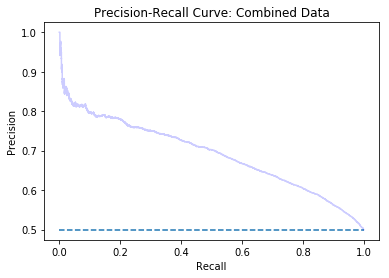

In [156]:
# Precision-Recall Curve
plt.step(recall2, precision2, color='b', alpha=0.2, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve: Combined Data')

## Remove Features with Zero Importance

In [245]:
df_balance2 = df_balance.copy()

In [265]:
selected_feature = pd.read_csv('random_forest_selection 2.csv')

In [250]:
df_balance2 = df_balance2[[col for col in df_balance2.columns if col in selected_feature['0'].tolist()]]
df_balance2.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,STATUS_0_PERC,STATUS_C_PERC,STATUS_X_PERC,CHILDREN_RATIO,INCOME_PER_CHLD,EMPLOYED_BIRTH_RATIO,LOAN_INCOME_RATIO,ANNUITY_LENGTH,INCOME_PER_PERSON,ANNUITY_INCOME_PERC
0,356175,0,Cash loans,F,N,Y,0,112500.0,177489.0,17419.5,...,0.000000,0.000000,1.000000,0.000000,112500.0,-14.865405,1.577680,10.189098,11.630717,0.393495
1,377504,0,Cash loans,F,N,Y,1,72000.0,263686.5,15138.0,...,0.000000,0.000000,1.000000,0.333333,36000.0,0.086717,3.662313,17.418847,10.085851,0.458527
2,107204,0,Cash loans,F,N,N,1,135000.0,1078200.0,38331.0,...,0.000000,0.000000,1.000000,0.333333,67500.0,0.236045,7.986667,28.128669,10.714440,0.532852
3,253282,0,Cash loans,M,Y,Y,2,225000.0,770292.0,32764.5,...,0.076923,0.857143,0.065934,0.500000,75000.0,0.125793,3.423520,23.509957,10.937579,0.381601
4,412322,0,Cash loans,F,N,Y,0,157500.0,474183.0,18004.5,...,0.000000,0.000000,1.000000,0.000000,157500.0,0.405055,3.010686,26.336916,11.274046,0.338103


## Explore Categorical Feature's Class

In [220]:
# Select Categorical Features
df_cat = df_balance2.select_dtypes('object')
display(df_cat.columns)
display(df_cat.shape)

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE',
       'NAME_CONTRACT_TYPE_Pre', 'FLAG_LAST_APPL_PER_CONTRACT_Pre',
       'NAME_CASH_LOAN_PURPOSE_Pre', 'NAME_CONTRACT_STATUS_Pre',
       'NAME_PAYMENT_TYPE_Pre', 'CODE_REJECT_REASON_Pre',
       'NAME_CLIENT_TYPE_Pre', 'NAME_GOODS_CATEGORY_Pre', 'NAME_PORTFOLIO_Pre',
       'NAME_PRODUCT_TYPE_Pre', 'CHANNEL_TYPE_Pre', 'NAME_SELLER_INDUSTRY_Pre',
       'NAME_YIELD_GROUP_Pre', 'PRODUCT_COMBINATION_Pre', 'CREDIT_ACTIVE_MAX',
       'CREDIT_TYPE_MAX'],
      dtype='object')

(49650, 28)

### Feature: NAME_TYPE_SUITE

In [190]:
suite = df_modified[['SK_ID_CURR','TARGET','NAME_TYPE_SUITE']]

In [191]:
counts = pd.DataFrame(suite['NAME_TYPE_SUITE'].value_counts())
counts['Type'] = counts.index
#display(counts.head())

dist = suite.groupby(['TARGET','NAME_TYPE_SUITE']).size().reset_index(name="Time")
dist = pd.merge(dist, counts, left_on='NAME_TYPE_SUITE', right_on='Type')
dist = dist.rename(columns = {'NAME_TYPE_SUITE_y': 'Total'})
dist['Contribution'] = dist['Time'] / dist['Total']
display(dist)

,TARGET,NAME_TYPE_SUITE_x,Time,Total,Type,Contribution
0,0,Children,3026,3267,Children,0.926232
1,1,Children,241,3267,Children,0.073768
2,0,Family,37140,40149,Family,0.925054
3,1,Family,3009,40149,Family,0.074946
4,0,Group of people,248,271,Group of people,0.915129
5,1,Group of people,23,271,Group of people,0.084871
6,0,Other_A,790,866,Other_A,0.912240
7,1,Other_A,76,866,Other_A,0.087760
8,0,Other_B,1596,1770,Other_B,0.901695
9,1,Other_B,174,1770,Other_B,0.098305


### Combine 1

In [221]:
# NAME_TYPE_SUITE
# Children & Family
df_balance2['NAME_TYPE_SUITE'] = df_balance2['NAME_TYPE_SUITE'].replace({'Children':'Family'})

### NAME_INCOME_TYPE

In [193]:
income = df_modified[['SK_ID_CURR','TARGET','NAME_INCOME_TYPE']]

In [194]:
counts = pd.DataFrame(income['NAME_INCOME_TYPE'].value_counts())
counts['Type'] = counts.index

dist = income.groupby(['TARGET','NAME_INCOME_TYPE']).size().reset_index(name="Time")
dist = pd.merge(dist, counts, left_on='NAME_INCOME_TYPE', right_on='Type')
dist = dist.rename(columns = {'NAME_INCOME_TYPE_y': 'Total'})
dist['Contribution'] = dist['Time'] / dist['Total']
display(dist)

,TARGET,NAME_INCOME_TYPE_x,Time,Total,Type,Contribution
0,0,Businessman,10,10,Businessman,1.000000
1,0,Commercial associate,66257,71617,Commercial associate,0.925157
2,1,Commercial associate,5360,71617,Commercial associate,0.074843
3,0,Maternity leave,3,5,Maternity leave,0.600000
4,1,Maternity leave,2,5,Maternity leave,0.400000
5,0,Pensioner,52380,55362,Pensioner,0.946136
6,1,Pensioner,2982,55362,Pensioner,0.053864
7,0,State servant,20454,21703,State servant,0.942450
8,1,State servant,1249,21703,State servant,0.057550
9,0,Student,18,18,Student,1.000000


### Combine 2: Inefficient

In [222]:
# NAME_INCOME_TYPE
# Maternity Leave & Unemployed
df_balance2['NAME_INCOME_TYPE'] = df_balance2['NAME_INCOME_TYPE'].replace({'Maternity leave':'Unemployed'})

### NAME_EDUCATION_TYPE

In [196]:
education = df_modified[['SK_ID_CURR','TARGET','NAME_EDUCATION_TYPE']]

In [197]:
counts = pd.DataFrame(education['NAME_EDUCATION_TYPE'].value_counts())
counts['Type'] = counts.index

dist = education.groupby(['TARGET','NAME_EDUCATION_TYPE']).size().reset_index(name="Time")
dist = pd.merge(dist, counts, left_on='NAME_EDUCATION_TYPE', right_on='Type')
dist = dist.rename(columns = {'NAME_EDUCATION_TYPE_y': 'Total'})
dist['Contribution'] = dist['Time'] / dist['Total']
display(dist)

,TARGET,NAME_EDUCATION_TYPE_x,Time,Total,Type,Contribution
0,0,Academic degree,161,164,Academic degree,0.981707
1,1,Academic degree,3,164,Academic degree,0.018293
2,0,Higher education,70854,74863,Higher education,0.946449
3,1,Higher education,4009,74863,Higher education,0.053551
4,0,Incomplete higher,9405,10277,Incomplete higher,0.915150
5,1,Incomplete higher,872,10277,Incomplete higher,0.084850
6,0,Lower secondary,3399,3816,Lower secondary,0.890723
7,1,Lower secondary,417,3816,Lower secondary,0.109277
8,0,Secondary / secondary special,198867,218391,Secondary / secondary special,0.910601
9,1,Secondary / secondary special,19524,218391,Secondary / secondary special,0.089399


### Combine 3

In [223]:
# NAME_EDUCATION_TYPE
# Secondary / secondary special	 & Incomplete higher
df_balance2['NAME_EDUCATION_TYPE'] = df_balance2['NAME_EDUCATION_TYPE'].replace({'Secondary / secondary special':'Secondary', 'Incomplete higher':'Secondary'})

### NAME_FAMILY_STATUS

In [199]:
family = df_modified[['SK_ID_CURR','TARGET','NAME_FAMILY_STATUS']]

In [200]:
counts = pd.DataFrame(family['NAME_FAMILY_STATUS'].value_counts())
counts['Type'] = counts.index

dist = family.groupby(['TARGET','NAME_FAMILY_STATUS']).size().reset_index(name="Time")
dist = pd.merge(dist, counts, left_on='NAME_FAMILY_STATUS', right_on='Type')
dist = dist.rename(columns = {'NAME_FAMILY_STATUS_y': 'Total'})
dist['Contribution'] = dist['Time'] / dist['Total']
display(dist)

,TARGET,NAME_FAMILY_STATUS_x,Time,Total,Type,Contribution
0,0,Civil marriage,26814,29775,Civil marriage,0.900554
1,1,Civil marriage,2961,29775,Civil marriage,0.099446
2,0,Married,181582,196432,Married,0.924401
3,1,Married,14850,196432,Married,0.075599
4,0,Separated,18150,19770,Separated,0.918058
5,1,Separated,1620,19770,Separated,0.081942
6,0,Single / not married,40987,45444,Single / not married,0.901923
7,1,Single / not married,4457,45444,Single / not married,0.098077
8,0,Unknown,2,2,Unknown,1.000000
9,0,Widow,15151,16088,Widow,0.941758


### Combine 4

In [224]:
# NAME_FAMILY_STATUS
# Married & Civil marriage
df_balance2['NAME_FAMILY_STATUS'] = df_balance2['NAME_FAMILY_STATUS'].replace({'Civil marriage':'Married'})

### NAME_HOUSING_TYPE

In [202]:
housing = df_modified[['SK_ID_CURR','TARGET','NAME_HOUSING_TYPE']]

In [217]:
counts = pd.DataFrame(housing['NAME_HOUSING_TYPE'].value_counts())
counts['Type'] = counts.index

dist = housing.groupby(['TARGET','NAME_HOUSING_TYPE']).size().reset_index(name="Time")
dist = pd.merge(dist, counts, left_on='NAME_HOUSING_TYPE', right_on='Type')
dist = dist.rename(columns = {'NAME_HOUSING_TYPE_y': 'Total'})
dist['Contribution'] = dist['Time'] / dist['Total']
display(dist)

,TARGET,NAME_HOUSING_TYPE_x,Time,Total,Type,Contribution
0,0,Co-op apartment,1033,1122,Co-op apartment,0.920677
1,1,Co-op apartment,89,1122,Co-op apartment,0.079323
2,0,House / apartment,251596,272868,House / apartment,0.922043
3,1,House / apartment,21272,272868,House / apartment,0.077957
4,0,Municipal apartment,10228,11183,Municipal apartment,0.914603
5,1,Municipal apartment,955,11183,Municipal apartment,0.085397
6,0,Office apartment,2445,2617,Office apartment,0.934276
7,1,Office apartment,172,2617,Office apartment,0.065724
8,0,Rented apartment,4280,4881,Rented apartment,0.876869
9,1,Rented apartment,601,4881,Rented apartment,0.123131


### Combine 5: Inefficient

In [225]:
# NAME_HOUSING_TYPE
# Married & Civil marriage
#df_balance2['NAME_HOUSING_TYPE'] = df_balance2['NAME_HOUSING_TYPE'].replace({'Co-op apartment':'Apartment', 'House / apartment':'Apartment'})
df_balance2['NAME_HOUSING_TYPE'] = df_balance2['NAME_HOUSING_TYPE'].replace({'Office apartment':'Office', 'Municipal apartment':'Office'})


### OCCUPATION_TYPE	

In [204]:
occupation = df_modified[['SK_ID_CURR','TARGET','OCCUPATION_TYPE']]

In [205]:
counts = pd.DataFrame(occupation['OCCUPATION_TYPE'].value_counts())
counts['Type'] = counts.index

dist = occupation.groupby(['TARGET','OCCUPATION_TYPE']).size().reset_index(name="Time")
dist = pd.merge(dist, counts, left_on='OCCUPATION_TYPE', right_on='Type')
dist = dist.rename(columns = {'OCCUPATION_TYPE_y': 'Total'})
dist['Contribution'] = dist['Time'] / dist['Total']
display(dist)

,TARGET,OCCUPATION_TYPE_x,Time,Total,Type,Contribution
0,0,Accountants,9339,9813,Accountants,0.951697
1,1,Accountants,474,9813,Accountants,0.048303
2,0,Cleaning staff,4206,4653,Cleaning staff,0.903933
3,1,Cleaning staff,447,4653,Cleaning staff,0.096067
4,0,Cooking staff,5325,5946,Cooking staff,0.895560
5,1,Cooking staff,621,5946,Cooking staff,0.104440
6,0,Core staff,25832,27570,Core staff,0.936960
7,1,Core staff,1738,27570,Core staff,0.063040
8,0,Drivers,16496,18603,Drivers,0.886739
9,1,Drivers,2107,18603,Drivers,0.113261


### Combine 6: Inefficient

In [206]:
# OCCUPATION_TYPE
#df_balance2['OCCUPATION_TYPE'] = df_balance2['OCCUPATION_TYPE'].replace({'High skill tech staff':'Tech staff', 'IT staff':'Tech staff'})

### ORGANIZATION_TYPE

In [210]:
organization = df_modified[['SK_ID_CURR','TARGET','ORGANIZATION_TYPE']]

In [211]:
counts = pd.DataFrame(organization['ORGANIZATION_TYPE'].value_counts())
counts['Type'] = counts.index

dist = organization.groupby(['TARGET','ORGANIZATION_TYPE']).size().reset_index(name="Time")
dist = pd.merge(dist, counts, left_on='ORGANIZATION_TYPE', right_on='Type')
dist = dist.rename(columns = {'ORGANIZATION_TYPE_y': 'Total'})
dist['Contribution'] = dist['Time'] / dist['Total']
display(dist)

,TARGET,ORGANIZATION_TYPE_x,Time,Total,Type,Contribution
0,0,Advertising,394,429,Advertising,0.918415
1,1,Advertising,35,429,Advertising,0.081585
2,0,Agriculture,2197,2454,Agriculture,0.895273
3,1,Agriculture,257,2454,Agriculture,0.104727
4,0,Bank,2377,2507,Bank,0.948145
5,1,Bank,130,2507,Bank,0.051855
6,0,Business Entity Type 1,5497,5984,Business Entity Type 1,0.918616
7,1,Business Entity Type 1,487,5984,Business Entity Type 1,0.081384
8,0,Business Entity Type 2,9653,10553,Business Entity Type 2,0.914716
9,1,Business Entity Type 2,900,10553,Business Entity Type 2,0.085284


### NAME_PAYMENT_TYPE_Pre

In [267]:
payment = df_modified[['SK_ID_CURR','TARGET','NAME_PAYMENT_TYPE_Pre']]

In [268]:
counts = pd.DataFrame(payment['NAME_PAYMENT_TYPE_Pre'].value_counts())
counts['Type'] = counts.index

dist = payment.groupby(['TARGET','NAME_PAYMENT_TYPE_Pre']).size().reset_index(name="Time")
dist = pd.merge(dist, counts, left_on='NAME_PAYMENT_TYPE_Pre', right_on='Type')
dist = dist.rename(columns = {'NAME_PAYMENT_TYPE_Pre_y': 'Total'})
dist['Contribution'] = dist['Time'] / dist['Total']
#display(dist)

,TARGET,NAME_PAYMENT_TYPE_Pre_x,Time,Total,Type,Contribution
0,0,Cash through the bank,178297,192816,Cash through the bank,0.924700
1,1,Cash through the bank,14519,192816,Cash through the bank,0.075300
2,0,Cashless from the account of the employer,49,54,Cashless from the account of the employer,0.907407
3,1,Cashless from the account of the employer,5,54,Cashless from the account of the employer,0.092593
4,0,Non-cash from your account,637,698,Non-cash from your account,0.912607
5,1,Non-cash from your account,61,698,Non-cash from your account,0.087393
6,0,XNA,71230,78420,XNA,0.908314
7,1,XNA,7190,78420,XNA,0.091686
8,0,['Cash through the bank' 'Cashless from the ac...,30,38,['Cash through the bank' 'Cashless from the ac...,0.789474
9,1,['Cash through the bank' 'Cashless from the ac...,8,38,['Cash through the bank' 'Cashless from the ac...,0.210526


### Random Forest: Combine Class

In [20]:
df_balance2 = df_balance.copy()

#### Combine Class

In [21]:
# Combine 1: Efficient
# NAME_TYPE_SUITE
# Children & Family
df_balance2['NAME_TYPE_SUITE'] = df_balance2['NAME_TYPE_SUITE'].replace({'Children':'Family'})

#### Data Cleaning

In [22]:
# Change categorical variable
ordinal_encoder = OrdinalEncoder()
cat_encoded = ordinal_encoder.fit_transform(df_balance2.select_dtypes('object'))
df_cat_encoded = pd.DataFrame(cat_encoded, columns = df_balance2.select_dtypes('object').columns)

# Normalize numeric variables
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df_num = df_balance2.select_dtypes(include = numerics)
df_col = df_num.columns[2:]
transformer = Normalizer().fit(df_num.iloc[:,2:])
df_index = df_num.iloc[:,0:2]
df_num = pd.DataFrame(transformer.transform(df_num.iloc[:,2:]),columns=df_col)

# Combine Data
df_num= pd.concat([df_index, df_num], axis=1, sort=False)
df_balance2 = pd.concat([df_num, df_cat_encoded], axis=1, sort=False) 

display(df_balance2.head())
display(df_balance2.shape)

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,NAME_CLIENT_TYPE_Pre,NAME_GOODS_CATEGORY_Pre,NAME_PORTFOLIO_Pre,NAME_PRODUCT_TYPE_Pre,CHANNEL_TYPE_Pre,NAME_SELLER_INDUSTRY_Pre,NAME_YIELD_GROUP_Pre,PRODUCT_COMBINATION_Pre,CREDIT_ACTIVE_MAX,CREDIT_TYPE_MAX
0,179789,0,3.338177e-07,0.049572,0.130509,0.006278,0.112663,8.215253e-09,-0.004509,-0.002019,...,1.0,24.0,2.0,5.0,0.0,10.0,21.0,1081.0,2.0,8.0
1,283326,0,0.000000e+00,0.024176,0.066091,0.004821,0.056410,5.935635e-10,-0.000889,-0.000124,...,2.0,24.0,4.0,0.0,5.0,10.0,0.0,2.0,2.0,3.0
2,291792,0,0.000000e+00,0.018993,0.047753,0.002338,0.047753,1.750942e-09,-0.002165,-0.000584,...,2.0,24.0,4.0,0.0,5.0,10.0,0.0,2.0,4.0,11.0
3,247071,0,6.100044e-07,0.082351,0.601942,0.016552,0.538024,2.211510e-08,-0.004416,-0.000461,...,0.0,10.0,3.0,0.0,4.0,3.0,28.0,12.0,2.0,3.0
4,285911,0,4.613620e-06,0.276817,0.420818,0.033446,0.380624,3.784706e-08,-0.022327,-0.001938,...,9.0,16.0,3.0,0.0,7.0,2.0,27.0,13.0,2.0,3.0


(49650, 288)

#### Random Forest

In [23]:
# 1. Data Prepariation
Y = np.array(df_balance2['TARGET'])
X = df_balance2.drop('TARGET', axis = 1).iloc[:,1:]
feature = list(X.columns)
X = np.array(X) 

# 2. Split data into training and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42) 

# 3. Train the Random Forest on Training Data
rf = RandomForestClassifier(n_estimators = 1000, random_state = 42, bootstrap=True, n_jobs=-1, min_samples_split=20, min_samples_leaf=10)
rf.fit(X_train, Y_train)

Y_pred = rf.predict(X_test)
Y_pred_prob = rf.predict_proba(X_test)


In [24]:
# AUC Score
metrics.roc_auc_score(Y_test, Y_pred)

0.6555124625492682

In [25]:
# Confusion Matrix
confusion_matrix(Y_test, Y_pred)

array([[5501, 2706],
       [2938, 5240]])

In [26]:
Y_positive_prob = Y_pred_prob[:,1]
precision3, recall3, _ = precision_recall_curve(Y_test, Y_positive_prob)

Text(0.5,1,'Precision-Recall Curve: Combined Data')

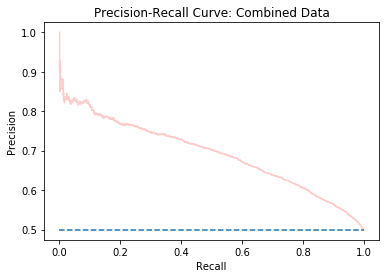

In [27]:
# plot no skill
plt.plot([0, 1], [0.5, 0.5], linestyle='--')

# Precision-Recall Curve
plt.step(recall3, precision3, color='r', alpha=0.2, where='post', label='Combined')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve: Combined Data')

### Up Sampling

In [13]:
selected_feature = pd.read_csv('random_forest_selection 2.csv')

In [17]:
df_modified = df_modified[[col for col in df_modified.columns if col in selected_feature['0'].tolist()]]
df_modified = df_modified.loc[:,~df_modified.columns.str.startswith('TARGET_')]

df_modified.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,STATUS_0_PERC,STATUS_C_PERC,STATUS_X_PERC,CHILDREN_RATIO,INCOME_PER_CHLD,EMPLOYED_BIRTH_RATIO,LOAN_INCOME_RATIO,ANNUITY_LENGTH,INCOME_PER_PERSON,ANNUITY_INCOME_PERC
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.409091,0.209091,0.136364,0.0,202500.0,0.067329,2.007889,16.461104,12.218500,0.349252
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.000000,0.000000,1.000000,0.0,270000.0,0.070862,4.790750,36.234085,11.813037,0.363615
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.000000,0.000000,1.000000,0.0,67500.0,0.011814,2.000000,20.000000,11.119898,0.316225
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.000000,0.000000,1.000000,0.0,135000.0,0.159905,2.316167,10.532818,11.119898,0.468933
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.000000,0.000000,1.000000,0.0,121500.0,0.152418,4.222222,23.461618,11.707678,0.424219


In [18]:
df_modified['NAME_TYPE_SUITE'] = df_modified['NAME_TYPE_SUITE'].replace({'Children':'Family'})

In [19]:
# Change categorical variable
ordinal_encoder = OrdinalEncoder()
cat_encoded = ordinal_encoder.fit_transform(df_modified.select_dtypes('object'))
df_cat_encoded = pd.DataFrame(cat_encoded, columns = df_modified.select_dtypes('object').columns)

# Normalize numeric variables
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df_num = df_modified.select_dtypes(include = numerics)
df_col = df_num.columns[2:]
transformer = Normalizer().fit(df_num.iloc[:,2:])
df_index = df_num.iloc[:,0:2]
df_num = pd.DataFrame(transformer.transform(df_num.iloc[:,2:]),columns=df_col)

# Combine Data
df_num= pd.concat([df_index, df_num], axis=1, sort=False)
df_modified = pd.concat([df_num, df_cat_encoded], axis=1, sort=False) 

display(df_modified.head())

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,NAME_CLIENT_TYPE_Pre,NAME_GOODS_CATEGORY_Pre,NAME_PORTFOLIO_Pre,NAME_PRODUCT_TYPE_Pre,CHANNEL_TYPE_Pre,NAME_SELLER_INDUSTRY_Pre,NAME_YIELD_GROUP_Pre,PRODUCT_COMBINATION_Pre,CREDIT_ACTIVE_MAX,CREDIT_TYPE_MAX
0,100002,1,0.0,0.191107,0.383721,0.023311,0.331252,-0.000601,-0.003443,-0.002001,...,0.0,23.0,3.0,0.0,7.0,0.0,29.0,15.0,2.0,3.0
1,100003,0,0.0,0.061659,0.295393,0.008152,0.257940,-0.000271,-0.000271,-0.000066,...,1.0,1361.0,3.0,0.0,107.0,243.0,30.0,3605.0,2.0,3.0
2,100004,0,0.0,0.270375,0.540750,0.027037,0.540750,-0.000901,-0.017064,-0.010138,...,0.0,17.0,3.0,0.0,6.0,2.0,30.0,14.0,2.0,2.0
3,100006,0,0.0,0.025084,0.058099,0.005516,0.055185,-0.000565,-0.001827,-0.000453,...,2.0,25.0,27.0,0.0,5.0,10.0,0.0,4315.0,4.0,12.0
4,100007,0,0.0,0.055153,0.232867,0.009925,0.232867,-0.001379,-0.001957,-0.001570,...,2.0,25.0,2.0,6.0,4.0,4.0,22.0,8.0,2.0,2.0


In [20]:
# 1. Data Prepariation: denoting X and Y variable
X = df_modified.drop('TARGET', axis = 1).iloc[:,1:]
Y = df_modified['TARGET']
feature = list(X.columns)

# 2. Split data into training and test set: 30% of data is test data, 70% of data is training 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [21]:
X_resampled, Y_resampled = SMOTE().fit_resample(X_train, Y_train)
X_resampled = pd.DataFrame(X_resampled,columns = X.columns)
Y_resampled = pd.DataFrame(Y_resampled,columns = ['TARGET'])

In [24]:
# 3. Train the Random Forest on Training Data
rf = RandomForestClassifier(n_estimators = 100, random_state = 12,bootstrap=True,n_jobs=-1,class_weight='balanced',criterion='entropy' )
rf.fit(X_resampled, Y_resampled)

Y_pred = rf.predict(X_test)
Y_pred_prob = rf.predict_proba(X_test)


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [25]:
# AUC Score
metrics.accuracy_score(Y_test, Y_pred)

0.9093309945900137

In [26]:
# Confusion Matrix
confusion_matrix(Y_test, Y_pred)

array([[91893,  1469],
       [ 7732,   385]])

In [51]:
Y_positive_prob = Y_pred_prob[:,1]
precision4, recall4, _ = precision_recall_curve(Y_test, Y_positive_prob)

Text(0.5,1,'Precision-Recall Curve: Up Sampling')

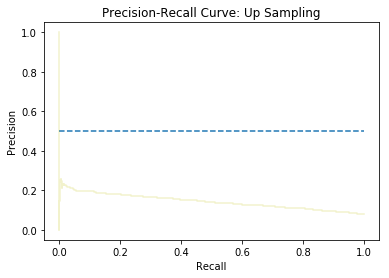

In [52]:
# plot no skill
plt.plot([0, 1], [0.5, 0.5], linestyle='--')

# Precision-Recall Curve
plt.step(recall4, precision4, color='y', alpha=0.2, where='post', label='Combined')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve: Up Sampling')

### Model Comparison

Text(0.5,1,'Precision-Recall Curve')

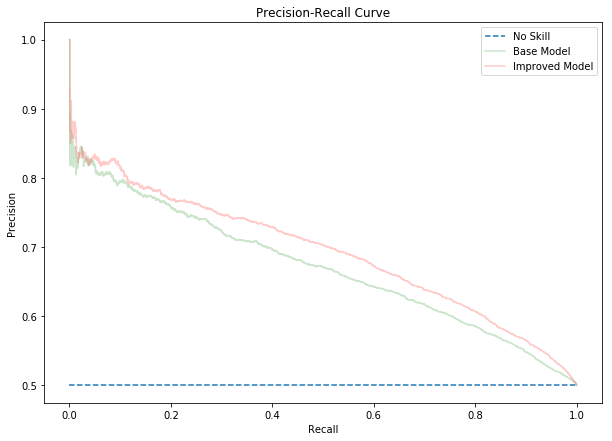

In [28]:
plt.figure(figsize=(10,7))
# plot no skill
plt.plot([0, 1], [0.5, 0.5], linestyle='--', label='No Skill')

# Precision-Recall Curve
plt.step(recall1, precision1, color='g', alpha=0.2, where='post', label='Base Model')
plt.step(recall3, precision3, color='r', alpha=0.2, where='post', label='Improved Model')

plt.legend(loc='upper right')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')